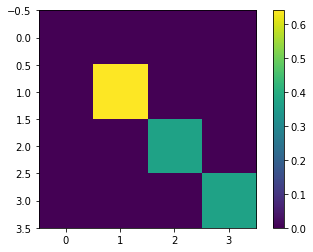

In [101]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import random
import os
from scipy.stats import norm

path='/Users/reneehlozek/Code/CIFAR_Network/GIMME/GIMME_analyses/CleanedGIMMEData/Control_Group_output/individual/'

number = 4
size=4
file = path+'10%02dBetas.csv'%number

data = np.loadtxt(file, skiprows=1, usecols=range(1,9), delimiter=',')
A = data[:,size:] #same day beta values, (4x4)
B = data[:,:size] #lagged beta values

cov = np.random.rand(size,size)# +np.eye(size)
#cov/=np.diag(cov)
cov*=0.01
plt.imshow(B)
plt.colorbar()


mask = make_mask(A)
#

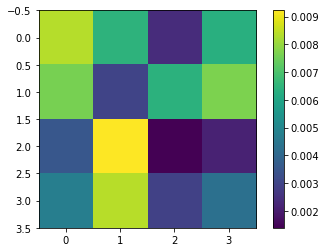

In [94]:
plt.imshow(cov)
plt.colorbar()

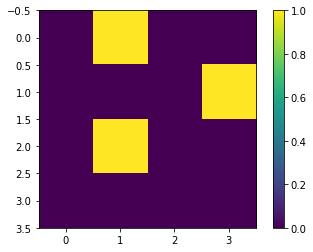

In [95]:
plt.imshow(mask)
plt.colorbar()

In [81]:
def make_mask(mat, contemp):
    size = np.shape(mat)[0]
    mask = np.ones((size,size))

    inds = np.where(mat==0)
    mask[inds]=0

    return mask

In [30]:
# newcov = (cov+np.dot(0.01*np.random.rand(size,size), cov))
# plt.matshow(newcov)
# plt.colorbar()


In [96]:
def coeff_draw_from_cov(mat,cov,mask):
    "draw a coefficient matrix from the mean matrix and the covariance"
    import numpy as np
    import matplotlib.pyplot as plt
    size=len(cov)
    #maskb=np.ones((size,size))
    noisy_mat = mat+np.dot(cov+np.dot(0.1*np.random.rand(size,size), cov), mask)
    return noisy_mat


# Make a mask for the non-zero indices - don't add noise to zero coefficients
# 0.1 sigma noise to everything, gaussian distribution 
# Do not add noise to the digit agonal of the contemporaneous

#Random vector in larger matrix - then checking that it is postitive definite

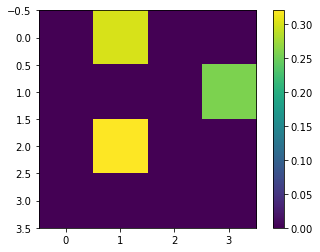

In [97]:
plt.imshow(A)
plt.colorbar()


array([[0.        , 0.0132269 , 0.        , 0.00783058],
       [0.        , 0.63525469, 0.        , 0.00483955],
       [0.        , 0.00627521, 0.        , 0.01071814],
       [0.        , 0.01023781, 0.        , 0.62739871]])

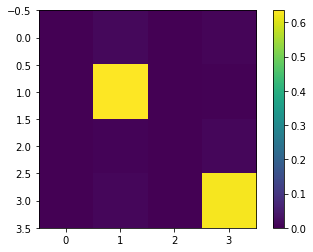

In [98]:
As = coeff_draw_from_cov(B,cov,mask)
plt.imshow(As)
plt.colorbar()
As

/var/folders/1b/3hxrghjn3f93mf719bbpxvz40000gn/T/ipykernel_88588/1979755346.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  samples[i,:]+=np.random.multivariate_normal(np.zeros(4),measurecov)


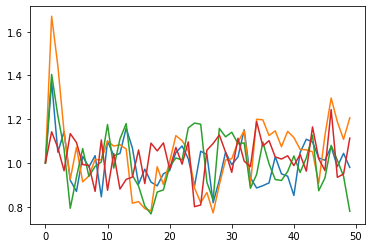

In [6]:
def generate_timeseries(start,len,contempmat, contempcov, lagmat, lagcov, measurecov):
    ''' Y = Ylag*lagmat + contempmat*Y 
    so Y= (Ylag*lagmat)*(I-contempmat)^-1
    '''
    size=np.shape(start)[0]
    #print(size,len)
    samples = np.zeros((len,size))
    samples[0,:] = start

    for i in range(1,len):
        noisy_lagmat = coeff_draw_from_cov(lagmat,lagcov)
        noisy_contempmat = coeff_draw_from_cov(contempmat,contempcov)
        #print(np.matmul(samples[i-1,:], noisy_lagmat))
        samples[i,:] = np.matmul(np.matmul(samples[i-1,:], noisy_lagmat),np.linalg.inv(np.eye(size)-noisy_contempmat))
        #samples[i,:]+=np.random.multivariate_normal(np.zeros(4),measurecov) # adding additional measurement noise

    samples[:,:]+= start
    samples[0,:] = start
    return samples

samples = generate_timeseries(np.array([1,1,1,1]),50,A, cov, B, cov,cov)
plt.clf()

for val in range(size):
    plt.plot(samples[:,val])